In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

### EDA Exploratory Data Analysis

In [2]:
# read movie meta data
movie_data=pd.read_csv('../../Data_Files/movie_metadata.csv')
movie_data.shape

(5043, 28)

In [3]:
movie_data.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [4]:
num_data=movie_data.select_dtypes(['int64','float64'])
cat_data=movie_data.select_dtypes(['object','category'])

In [6]:
movie_data.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [7]:
num_data.columns

Index(['num_critic_for_reviews', 'duration', 'director_facebook_likes',
       'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross',
       'num_voted_users', 'cast_total_facebook_likes', 'facenumber_in_poster',
       'num_user_for_reviews', 'budget', 'title_year',
       'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio',
       'movie_facebook_likes'],
      dtype='object')

In [8]:
cat_data.columns

Index(['color', 'director_name', 'actor_2_name', 'genres', 'actor_1_name',
       'movie_title', 'actor_3_name', 'plot_keywords', 'movie_imdb_link',
       'language', 'country', 'content_rating'],
      dtype='object')

In [11]:
movie_data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [10]:
num_data.isna().sum().sort_values(ascending=False)

gross                        884
budget                       492
aspect_ratio                 329
title_year                   108
director_facebook_likes      104
num_critic_for_reviews        50
actor_3_facebook_likes        23
num_user_for_reviews          21
duration                      15
facenumber_in_poster          13
actor_2_facebook_likes        13
actor_1_facebook_likes         7
cast_total_facebook_likes      0
num_voted_users                0
imdb_score                     0
movie_facebook_likes           0
dtype: int64

### filling movie['gross'] null data

In [ ]:
movie_data['gross'].fillna(value=movie_data['gross'].mean(), inplace=True)

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
5038   NaN
5039   NaN
5040   NaN
5041   NaN
5042   NaN
Name: gross, Length: 5043, dtype: float64

In [20]:
movie_data.isna().sum().sort_values(ascending=False)

gross                        5043
budget                        492
aspect_ratio                  329
content_rating                303
plot_keywords                 153
title_year                    108
director_facebook_likes       104
director_name                 104
num_critic_for_reviews         50
actor_3_facebook_likes         23
actor_3_name                   23
num_user_for_reviews           21
color                          19
duration                       15
language                       14
actor_2_facebook_likes         13
actor_2_name                   13
facenumber_in_poster           13
actor_1_name                    7
actor_1_facebook_likes          7
country                         5
genres                          0
movie_title                     0
cast_total_facebook_likes       0
movie_imdb_link                 0
num_voted_users                 0
imdb_score                      0
movie_facebook_likes            0
dtype: int64

In [16]:
movie_data['gross'].isna().sum()

np.int64(5043)

In [21]:
movie_df=pd.read_csv('../../Data_Files/movie_metadata1.csv')
movie_df.shape

(5043, 28)

### filling numerical missing data

In [33]:
movie_df['gross'].isna().sum()

np.int64(0)

In [30]:
movie_df['gross'].dtype

dtype('float64')

In [41]:

movie_df['gross'].fillna(value=movie_df['gross'].mean(), inplace=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_27368\3714921038.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  movie_df['gross'].fillna(value=movie_df['gross'].mean(), inplace=True)


In [42]:
movie_df['gross'].isna().sum()

np.int64(0)

### Filling Categorical missing data

In [35]:
movie_df['color'].isna().sum()

np.int64(19)

In [37]:
movie_df['color'].unique()

array(['Color', nan, ' Black and White'], dtype=object)

In [38]:
movie_df['color'].head()

0    Color
1    Color
2    Color
3    Color
4      NaN
Name: color, dtype: object

In [39]:
movie_df['color'].fillna(movie_df['color'].mode()[0], inplace=True)

In [40]:
movie_df.isna().sum().sort_values(ascending=False)

budget                       492
aspect_ratio                 329
content_rating               303
plot_keywords                153
title_year                   108
director_name                104
director_facebook_likes      104
num_critic_for_reviews        50
actor_3_name                  23
actor_3_facebook_likes        23
num_user_for_reviews          21
duration                      15
language                      14
actor_2_facebook_likes        13
actor_2_name                  13
facenumber_in_poster          13
actor_1_facebook_likes         7
actor_1_name                   7
country                        5
color                          0
movie_title                    0
genres                         0
gross                          0
cast_total_facebook_likes      0
movie_imdb_link                0
num_voted_users                0
imdb_score                     0
movie_facebook_likes           0
dtype: int64

### creating pipeline to fill all NA values at a time - will work better for numerical col

In [46]:
for i in num_data.columns:
    print(i)

num_critic_for_reviews
duration
director_facebook_likes
actor_3_facebook_likes
actor_1_facebook_likes
gross
num_voted_users
cast_total_facebook_likes
facenumber_in_poster
num_user_for_reviews
budget
title_year
actor_2_facebook_likes
imdb_score
aspect_ratio
movie_facebook_likes


In [59]:
for col in movie_df.columns:
    if movie_df[col].dtype in ['int64','float64']:
        movie_df[col].fillna(value=movie_df[col].mean(), inplace=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_27368\2684370107.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  movie_df[col].fillna(value=movie_df[col].mean(), inplace=True)


In [60]:
movie_df.isna().sum().sort_values(ascending=False)

content_rating               303
plot_keywords                153
director_name                104
actor_3_name                  23
language                      14
actor_2_name                  13
actor_1_name                   7
country                        5
duration                       0
num_critic_for_reviews         0
actor_3_facebook_likes         0
color                          0
movie_title                    0
genres                         0
gross                          0
actor_1_facebook_likes         0
director_facebook_likes        0
cast_total_facebook_likes      0
facenumber_in_poster           0
num_voted_users                0
num_user_for_reviews           0
movie_imdb_link                0
budget                         0
title_year                     0
actor_2_facebook_likes         0
imdb_score                     0
aspect_ratio                   0
movie_facebook_likes           0
dtype: int64

### Distribution of IMDB-Score

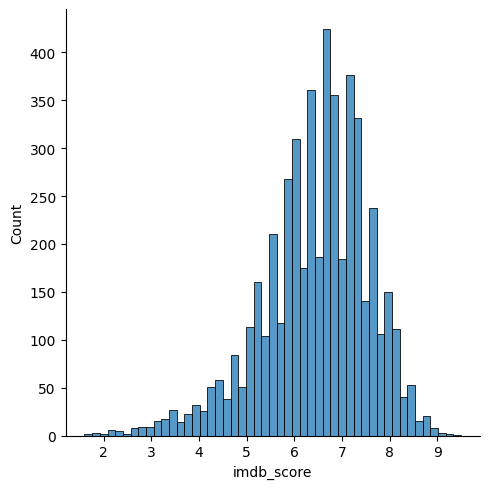

In [43]:
sns.displot(movie_data['imdb_score'])

In [61]:
movie_fd_2=pd.read_csv('../../Data_Files/movie_metadata.csv')
movie_fd_2.shape

(5043, 28)

In [62]:
movie_fd_2.isna().sum().sort_values(ascending=False)

gross                        884
budget                       492
aspect_ratio                 329
content_rating               303
plot_keywords                153
title_year                   108
director_facebook_likes      104
director_name                104
num_critic_for_reviews        50
actor_3_facebook_likes        23
actor_3_name                  23
num_user_for_reviews          21
color                         19
duration                      15
language                      14
actor_2_facebook_likes        13
actor_2_name                  13
facenumber_in_poster          13
actor_1_name                   7
actor_1_facebook_likes         7
country                        5
genres                         0
movie_title                    0
cast_total_facebook_likes      0
movie_imdb_link                0
num_voted_users                0
imdb_score                     0
movie_facebook_likes           0
dtype: int64

In [67]:
top_10_movies_genres=movie_fd_2['genres'].value_counts().head(10)
top_10_movies_genres


genres
Drama                          236
Comedy                         209
Comedy|Drama                   191
Comedy|Drama|Romance           187
Comedy|Romance                 158
Drama|Romance                  152
Crime|Drama|Thriller           101
Horror                          71
Action|Crime|Drama|Thriller     68
Action|Crime|Thriller           65
Name: count, dtype: int64

In [68]:
top_10_movies_genres.index

Index(['Drama', 'Comedy', 'Comedy|Drama', 'Comedy|Drama|Romance',
       'Comedy|Romance', 'Drama|Romance', 'Crime|Drama|Thriller', 'Horror',
       'Action|Crime|Drama|Thriller', 'Action|Crime|Thriller'],
      dtype='object', name='genres')

### Handling Duplicate Data
1. Extracting only those record which are duplicate in my dataframe apply conditional filtering

In [ ]:
# if all values(all col values) in the row are duplicate it will return all those rows
movie_fd_2[movie_fd_2.duplicated()] # total 45 rows are duplicates

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
137,Color,David Yates,248.0,110.0,282.0,103.0,Alexander Skarsgård,11000.0,124051759.0,Action|Adventure|Drama|Romance,...,239.0,English,USA,PG-13,180000000.0,2016.0,10000.0,6.6,2.35,29000
187,Color,Bill Condon,322.0,115.0,386.0,12000.0,Kristen Stewart,21000.0,292298923.0,Adventure|Drama|Fantasy|Romance,...,329.0,English,USA,PG-13,120000000.0,2012.0,17000.0,5.5,2.35,65000
204,Color,Hideaki Anno,1.0,120.0,28.0,12.0,Shin'ya Tsukamoto,544.0,NaN,Action|Adventure|Drama|Horror|Sci-Fi,...,13.0,Japanese,Japan,NaN,NaN,2016.0,106.0,8.2,2.35,0
303,Color,Joe Wright,256.0,111.0,456.0,394.0,Cara Delevingne,20000.0,34964818.0,Adventure|Family|Fantasy,...,186.0,English,USA,PG,150000000.0,2015.0,548.0,5.8,2.35,24000
389,Color,Josh Trank,369.0,100.0,128.0,78.0,Reg E. Cathey,596.0,56114221.0,Action|Adventure|Sci-Fi,...,695.0,English,USA,PG-13,120000000.0,2015.0,360.0,4.3,2.35,41000
395,Color,Rob Cohen,187.0,106.0,357.0,4000.0,Vin Diesel,23000.0,144512310.0,Action|Crime|Thriller,...,988.0,English,USA,PG-13,38000000.0,2001.0,14000.0,6.7,2.35,14000
590,Color,Brett Ratner,245.0,101.0,420.0,467.0,Rufus Sewell,12000.0,72660029.0,Action|Adventure,...,269.0,English,USA,PG-13,100000000.0,2014.0,3000.0,6.0,2.35,21000
656,Color,Paul Verhoeven,196.0,113.0,719.0,217.0,Rachel Ticotin,605.0,119412921.0,Action|Sci-Fi,...,391.0,English,USA,R,65000000.0,1990.0,308.0,7.5,1.85,0
794,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623279547.0,Action|Adventure|Sci-Fi,...,1722.0,English,USA,PG-13,220000000.0,2012.0,21000.0,8.1,1.85,123000
1220,Color,Angelina Jolie Pitt,322.0,137.0,11000.0,465.0,Jack O'Connell,769.0,115603980.0,Biography|Drama|Sport|War,...,351.0,English,USA,PG-13,65000000.0,2014.0,698.0,7.2,2.35,35000
